In [113]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [114]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [115]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [116]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [117]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [118]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [119]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [120]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent

('2017-08-23',)

In [127]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
recentest_date = dt.datetime.strptime(str(recent_date), "('%Y-%m-%d',)").date()

one_year_ago=   recentest_date- dt.timedelta(days=365)
one_year_ago

datetime.date(2016, 8, 23)

In [128]:
# Perform a query to retrieve the data and percipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).\
    all()
results[1:2]

[('2016-08-24', 0.08)]

In [132]:



# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns = ['date', 'precipitation'])

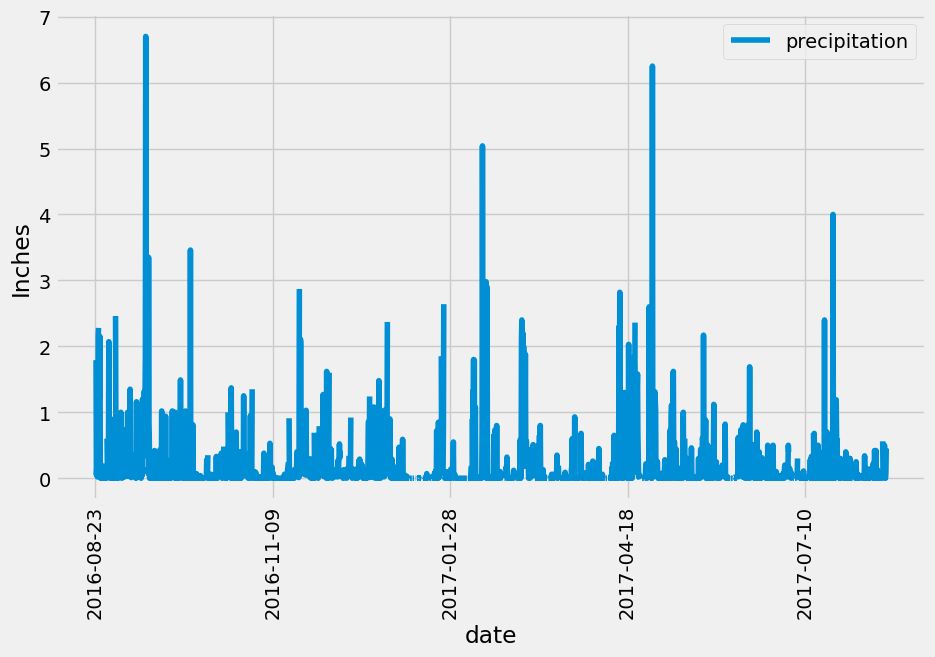

In [133]:
# make the df 


# Sort the dataframe by date
df = df.sort_values('date')


# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='date', y='precipitation', figsize=(10, 6))
plt.ylabel('Inches')
plt.xticks(rotation=90)
plt.show()



In [134]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [135]:
# Design a query to calculate the total number of stations in the dataset
stations_tot = session.query((func.count(Station.station))).scalar()
print( 'all da stations = ',stations_tot)

all da stations =  9


In [136]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations_act = session.query(Measurement.station, func.count(Measurement.station)).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).\
                all()
stations_act

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [139]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
stats = session.query(func.min(Measurement.tobs), # get min
                        func.max(Measurement.tobs), # get max
                        func.avg(Measurement.tobs)).\
                        filter(Measurement.station == stations_act[0][0]).\
                        all() # only want the most active one 
stats

                       

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'temp')

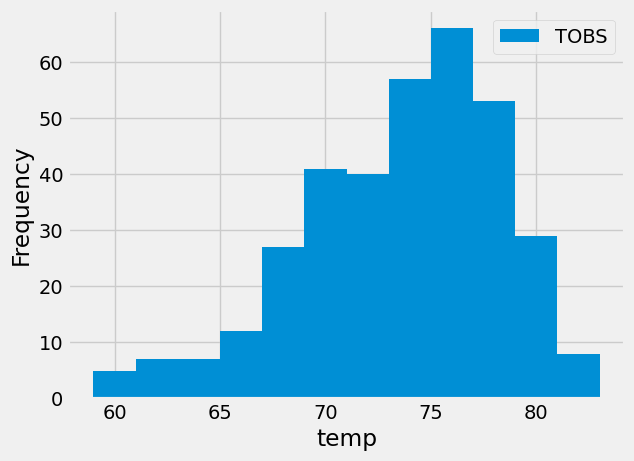

In [140]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station

Station_act_12 = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= one_year_ago, Measurement.station == stations_act[0][0]).\
    all()


#  plot the results as a histogram

df = pd.DataFrame(Station_act_12, columns = ['Date', 'TOBS'])

df.plot.hist( column = 'TOBS', #Temperature at the time of observation
             bins = 12).set_xlabel('temp')


# Close Session

In [141]:
# Close Session
session.close()